In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set(style="whitegrid")


Dataset Shape: (5117, 3)
  label                                         email_text  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                    email_text_clean  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  

Label Distribution:
 label
ham     4487
spam     630
Name: count, dtype: int64


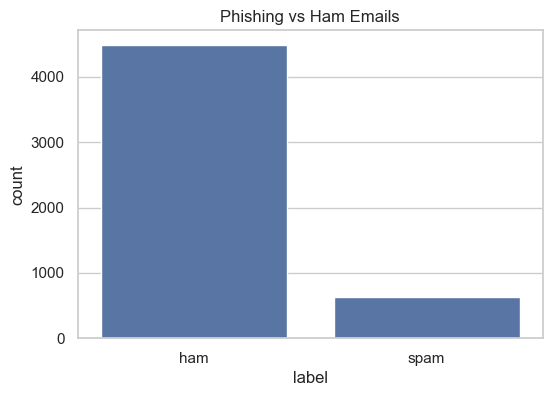

In [4]:
# Load the cleaned dataset
df = pd.read_csv("../datasets/phishing_clean.csv")

print("Dataset Shape:", df.shape)
print(df.head())

# Check label distribution
label_counts = df['label'].value_counts()
print("\nLabel Distribution:\n", label_counts)

# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Phishing vs Ham Emails")
plt.show()


In [5]:
import joblib

# Load TF-IDF Vectorizer
tfidf = joblib.load("../models/tfidf_vectorizer.pkl")  # adjust path if needed
print("TF-IDF Vectorizer loaded successfully.")
print("Vocabulary size:", len(tfidf.vocabulary_))


TF-IDF Vectorizer loaded successfully.
Vocabulary size: 5000


In [7]:
from sklearn.model_selection import train_test_split

# Features and labels
X = df['email_text_clean'].fillna("")  # use cleaned email text
y = df['label']

# Transform text to TF-IDF vectors
X_tfidf = tfidf.transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (4093, 5000)
X_test shape: (1024, 5000)
y_train shape: (4093,)
y_test shape: (1024,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc*100:.2f}%")
    
    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "model": model,
        "accuracy": acc,
        "classification_report": cr,
        "confusion_matrix": cm
    }



Training Logistic Regression...
Accuracy: 94.24%

Training Naive Bayes...
Accuracy: 97.85%

Training Linear SVM...
Accuracy: 98.44%


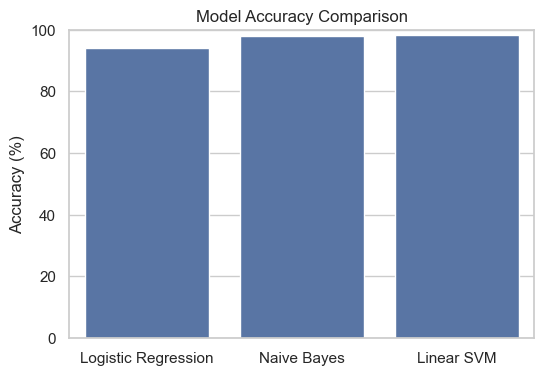

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph of model accuracies
plt.figure(figsize=(6,4))
sns.barplot(
    x=list(results.keys()), 
    y=[results[m]['accuracy']*100 for m in results]
)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 100)
plt.show()


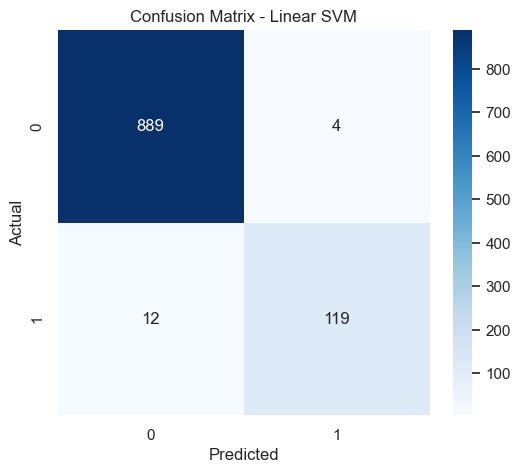


🏆 Best Model: Linear SVM with Accuracy: 98.44%


In [10]:
# Find the winner model
winner_name = max(results, key=lambda x: results[x]['accuracy'])
winner_cm = results[winner_name]['confusion_matrix']

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(winner_cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {winner_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"\n🏆 Best Model: {winner_name} with Accuracy: {results[winner_name]['accuracy']*100:.2f}%")
